<a href="https://colab.research.google.com/github/shahabday/DSR-practical-computer-vision/blob/main/scratchpad_pet_classification_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import fastai


In [2]:
from fastai.vision.all import *

dir(URLs)

['ADULT_SAMPLE',
 'AG_NEWS',
 'AMAZON_REVIEWS',
 'AMAZON_REVIEWS_POLARITY',
 'BIWI_HEAD_POSE',
 'BIWI_SAMPLE',
 'CALTECH_101',
 'CAMVID',
 'CAMVID_TINY',
 'CARS',
 'CIFAR',
 'CIFAR_100',
 'COCO_SAMPLE',
 'COCO_TINY',
 'CUB_200_2011',
 'DBPEDIA',
 'DOGS',
 'FLOWERS',
 'FOOD',
 'GOOGLE',
 'HUMAN_NUMBERS',
 'IMAGENETTE',
 'IMAGENETTE_160',
 'IMAGENETTE_320',
 'IMAGEWANG',
 'IMAGEWANG_160',
 'IMAGEWANG_320',
 'IMAGEWOOF',
 'IMAGEWOOF_160',
 'IMAGEWOOF_320',
 'IMDB',
 'IMDB_SAMPLE',
 'LOCAL_PATH',
 'LSUN_BEDROOMS',
 'MACAQUES',
 'MDL',
 'ML_100k',
 'ML_SAMPLE',
 'MNIST',
 'MNIST_SAMPLE',
 'MNIST_TINY',
 'MNIST_VAR_SIZE_TINY',
 'MT_ENG_FRA',
 'OPENAI_TRANSFORMER',
 'PASCAL_2007',
 'PASCAL_2012',
 'PETS',
 'PLANET_SAMPLE',
 'PLANET_TINY',
 'S3',
 'S3_AUDI',
 'S3_COCO',
 'S3_IMAGE',
 'S3_IMAGELOC',
 'S3_MODEL',
 'S3_NLP',
 'SIIM_SMALL',
 'SOGOU_NEWS',
 'TCGA_SMALL',
 'URL',
 'WIKITEXT',
 'WIKITEXT_TINY',
 'WT103_BWD',
 'WT103_FWD',
 'YAHOO_ANSWERS',
 'YELP_REVIEWS',
 'YELP_REVIEWS_POLARITY',
 

In [3]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz'

In [4]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [5]:
from pathlib import Path
import os
save_path = Path('/gdrive/MyDrive/oxford-pets')
os.makedirs(save_path, exist_ok=True)


In [6]:
path = untar_data(URLs.PETS, data=save_path )
path

Path('/gdrive/MyDrive/oxford-pets/oxford-iiit-pet')

In [8]:
# Check how many images we have on the decompressed folder
len(os.listdir(path / 'images'))

7393

In [9]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

In [15]:
dls = pets.dataloaders(path/"images")
list(dls)

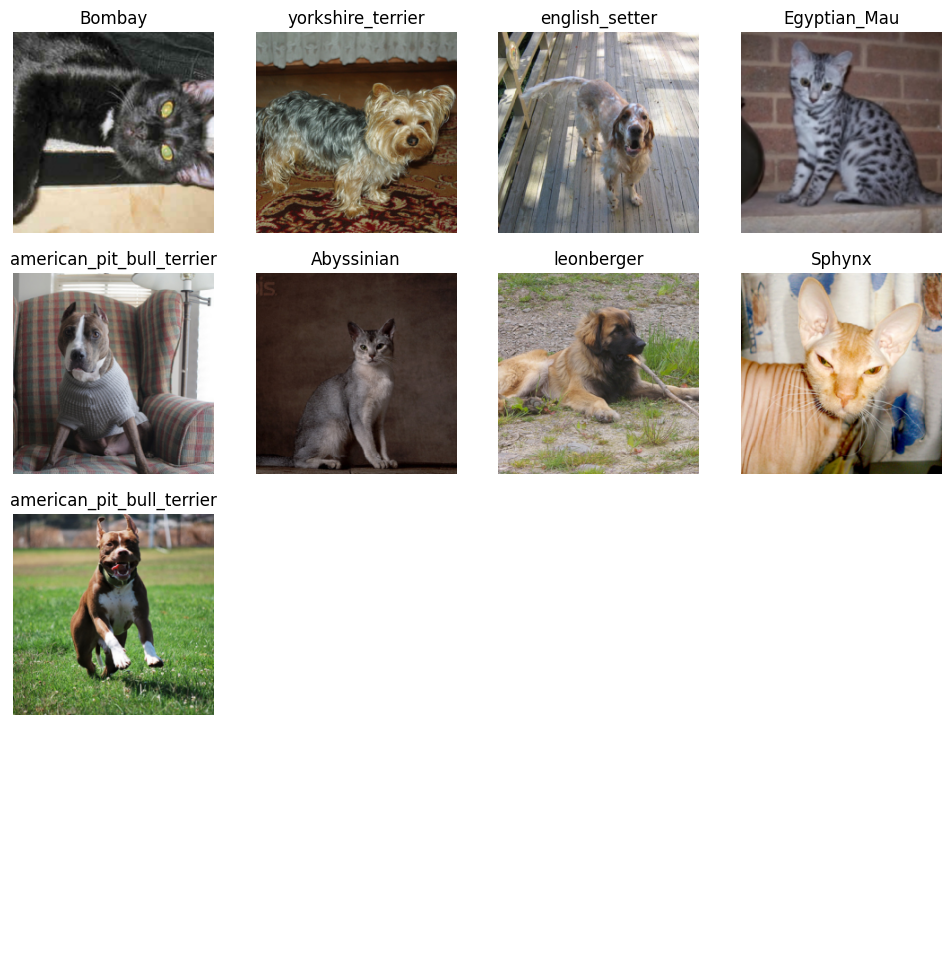

In [16]:
dls.valid.show_batch(nrows=4, ncols=4)

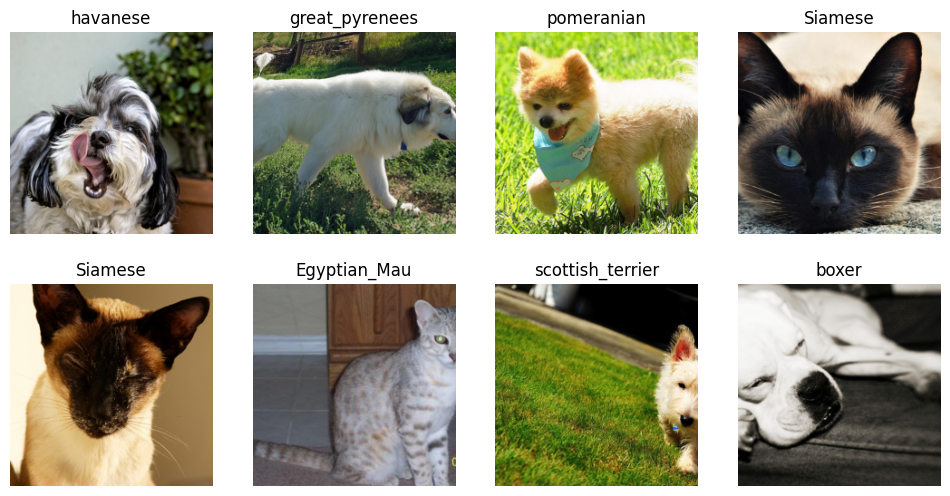

In [17]:
dls.train.show_batch(nrows=2, ncols=4)

In [18]:
pets.summary(path/'images')

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /gdrive/MyDrive/oxford-pets/oxford-iiit-pet/images/saint_bernard_96.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x332
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /gdrive/MyDrive/oxford-pets/oxford-iiit-pet/images/saint_bernard_96.jpg
    applying partial gives
      saint_bernard
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(30)

Final sample: (PILImage mode=RGB size=500x332, TensorCategory(30))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': F

In [19]:
#error rate = 1 - accuracy
learn = vision_learner(dls, resnet18, metrics = error_rate)



Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 79.8MB/s]


In [20]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  